In [19]:
# data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pickle files
import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("utils")
sys.path.append('project_files')

#cali functions
import functions_cali_homes_model as cf


plt.style.use('dark_background')


load the data, add a region feature

In [20]:
#load the data
df=pd.read_csv('project_files/sklearn_cali_housing.csv')

#retrieve the region data from the .pkl file
with open("utils/Cali_Housing_LatMinLatMax_LongMinLongMax_key.pkl", "rb") as f:
    region_data = pickle.load(f)

# add a region feature
df['Region']=df.apply(lambda row: cf.get_region(row['Latitude'],row['Longitude'],region_data),axis=1)

#remove zeros
df=df.loc[(df!=0).all(axis=1)]

# Simple, one feature, linear regression using the 'Region' feature derived from latitudes and longitudes

As demonstrated in the accompanying Cali_Housing.ipynb file, the following coefficients were derived after log transformation across all columns

In [21]:
coefficients1={'Region': 0.9925411085931134, 'intercept': -0.015509072764321674}

In [22]:
#predict the target and use np.exp() to reverse the log transformation
df1=df.copy()
#df1[['Region']]=np.log(df1[['Region']])
df1['predicted_target']=df1.apply(lambda row: row['Region']*coefficients1['Region']+coefficients1['intercept'],axis=1)

# r2 score

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(df1['Target'], df1['predicted_target'])
print(r2)

0.8343988779447519


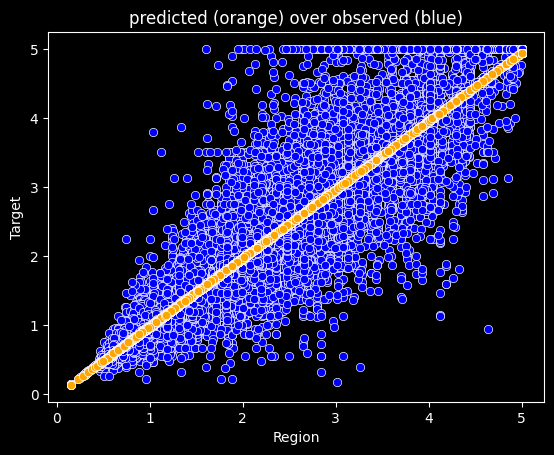

In [24]:
plt.title('predicted (orange) over observed (blue)');sns.scatterplot(x=df1['Region'],y=df1['Target'],color='blue');sns.scatterplot(x=df1['Region'],y=df1['predicted_target'],color='orange')
plt.show()

## a model with more features and with coefficients derived from Lasso L2 penalty regularization 

In [25]:
coefficients2={'Region': 0.8935104332595226,
 'HouseAge': 0.019142823279991422,
 'AveRooms': 0.08880735297600134,
 'AveBedrms': -0.014203403967603405,
 'Population': -0.001826275941154776,
 'AveOccup': -0.06401278331209824,
 'MedInc': 0.17019346000488064,
 'intercept': -0.2916778874667836}

In [26]:
df2=df.copy()
cols_to_use2=[i for i in coefficients2.keys() if i in df2.columns]
df2=np.log(df2)
df2['predicted_target']=df2.apply(lambda row: sum(row[i]*coefficients2[i] for i in cols_to_use2)+coefficients2['intercept'],axis=1)
df2=np.exp(df2)
r2df2=r2_score(df2['Target'],df2['predicted_target'])
print(f'The r2 score is {r2df2}')

The r2 score is 0.8611502807068141


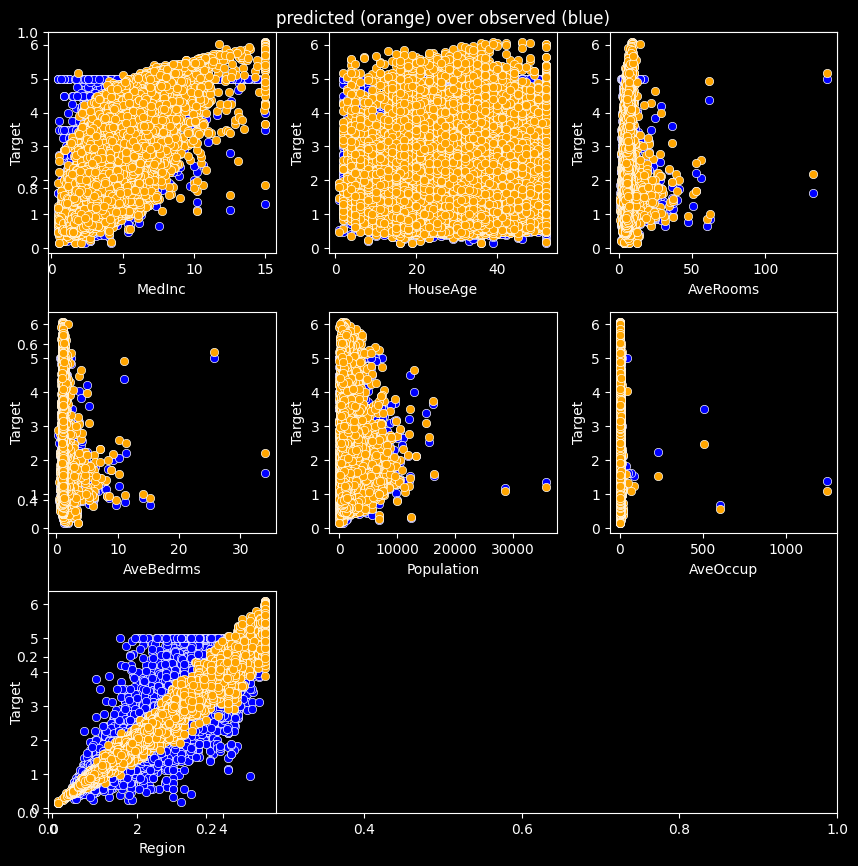

In [27]:
data=df2.drop(columns=['Latitude','Longitude'])
target,pred,plot_size='Target','predicted_target',3


cf.plot_pred(data,target,pred,plot_size=3)
